In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re, requests
from bs4 import BeautifulSoup
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [2]:
#Importing data to work with
segment_df = pd.read_excel("nvidia_revenue.xlsx",sheet_name="segment")
geo_df = pd.read_excel("nvidia_revenue.xlsx",sheet_name="geographical")
market_df = pd.read_excel("nvidia_revenue.xlsx",sheet_name="markets")

In [3]:
segment_df

,Unnamed: 0,2020,2021,2022
0,Graphics,7639,9834,15868
1,Computing & Networking,3279,6841,11046


In [4]:
segment_df = pd.melt(segment_df, value_vars=[2020, 2021,2022],id_vars=['Unnamed: 0'],value_name="Amount",var_name="Year")

In [5]:
segment_df=segment_df.rename(columns={"Unnamed: 0":"Segments"})
segment_df

,Segments,Year,Amount
0,Graphics,2020,7639
1,Computing & Networking,2020,3279
2,Graphics,2021,9834
3,Computing & Networking,2021,6841
4,Graphics,2022,15868
5,Computing & Networking,2022,11046


In [6]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.0f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.0f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

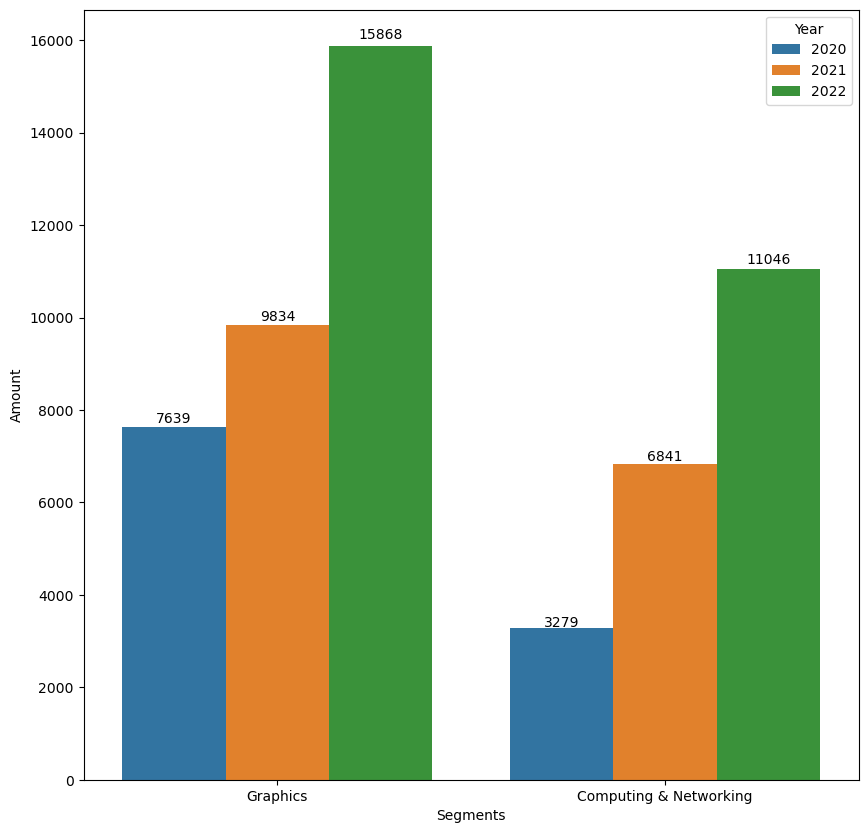

In [7]:
plt.figure(figsize=[10,10])
d = sns.barplot(data=segment_df,x="Segments",y="Amount",hue="Year")
show_values(d)

In [8]:
market_df = pd.melt(market_df, value_vars=[2020, 2021,2022],id_vars=['Unnamed: 0'],value_name="Amount",var_name="Year")
market_df=market_df.rename(columns={"Unnamed: 0":"Markets"})
market_df

,Markets,Year,Amount
0,Gaming,2020,5518
1,Data Center,2020,2983
2,Professional Visualization,2020,1212
3,Automotive,2020,700
4,OEM & Other,2020,505
5,Gaming,2021,7759
6,Data Center,2021,6696
7,Professional Visualization,2021,1053
8,Automotive,2021,536
9,OEM & Other,2021,631


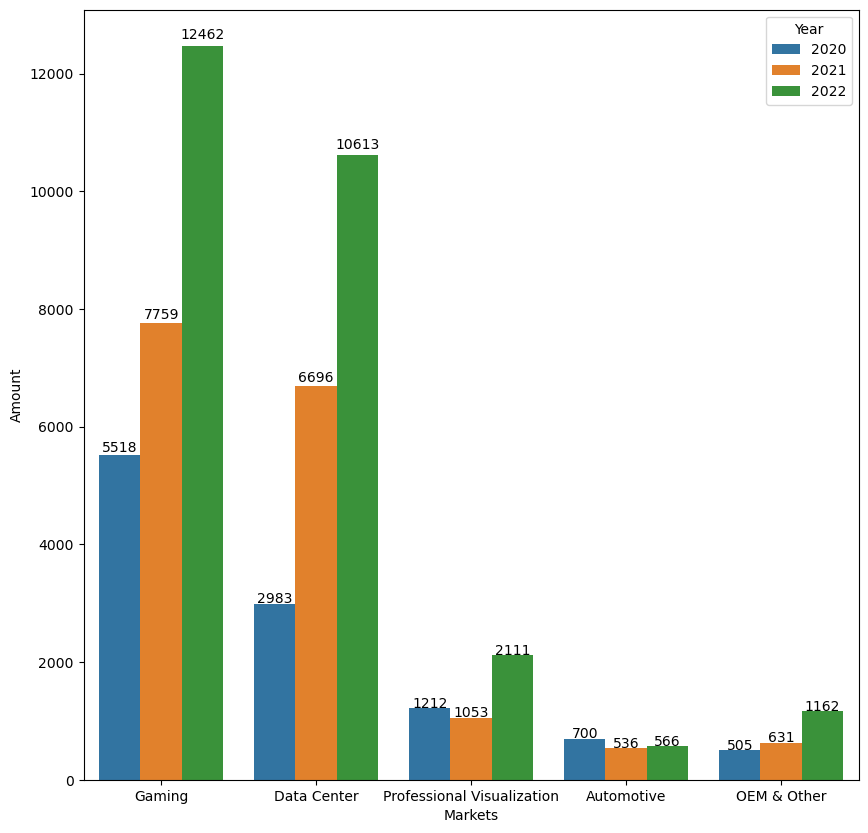

In [9]:
plt.figure(figsize=[10,10])
p = sns.barplot(data=market_df,x="Markets",y="Amount",hue="Year")
show_values(p)

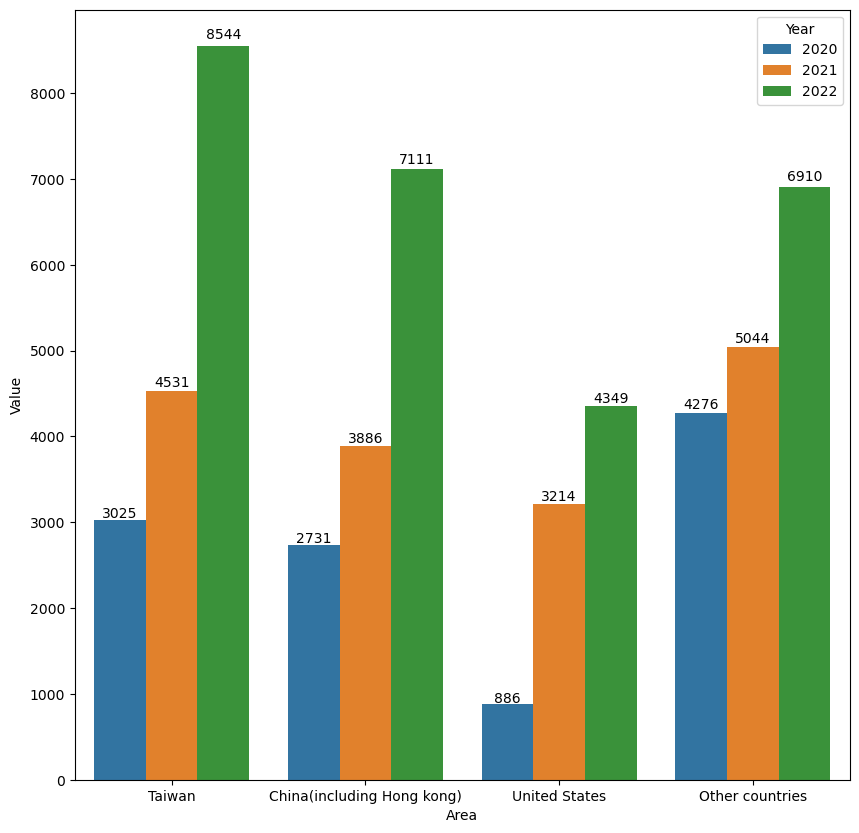

In [10]:
plt.figure(figsize=[10,10])
q = sns.barplot(data=geo_df,x="Area",y="Value",hue="Year")
show_values(q)

In [2]:
historical_df = pd.read_excel("nvidia_revenue.xlsx",sheet_name="historical")
historical_df

,Year,Amount
0,2022,26914
1,2021,16675
2,2020,10918
3,2019,11716
4,2018,9714
5,2017,6910
6,2016,5010
7,2015,4682
8,2014,4130
9,2013,4280


In [3]:
historical_df["Amount"] = historical_df["Amount"]/1000
historical_df

,Year,Amount
0,2022,26.914
1,2021,16.675
2,2020,10.918
3,2019,11.716
4,2018,9.714
5,2017,6.910
6,2016,5.010
7,2015,4.682
8,2014,4.130
9,2013,4.280


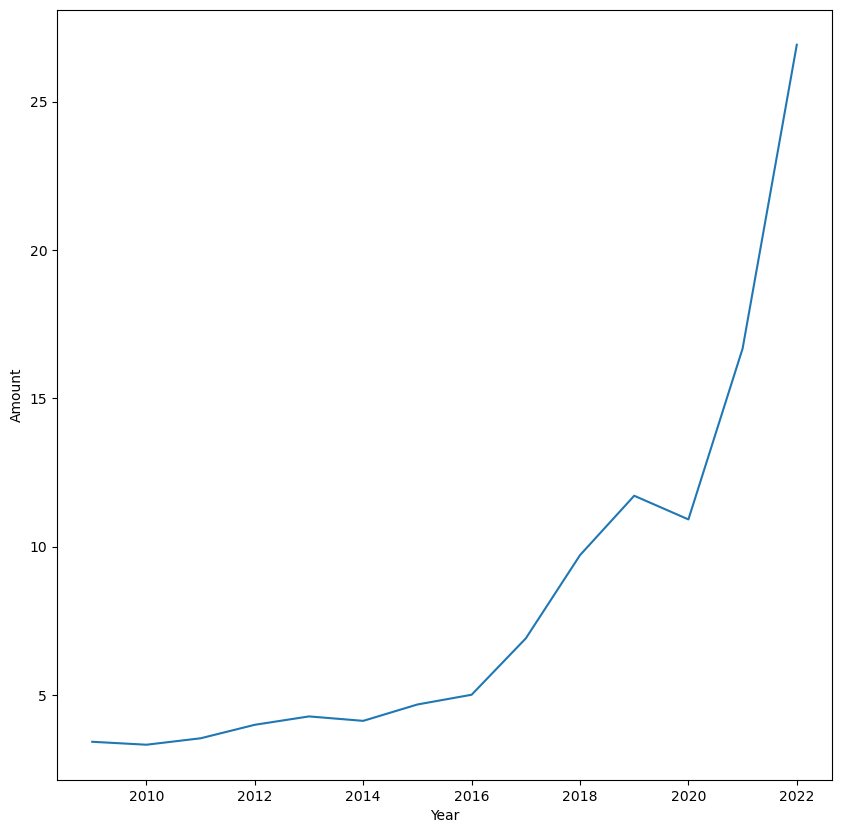

In [13]:
plt.figure(figsize=[10,10])
sns.lineplot(data=historical_df,x="Year",y="Amount")
plt.show()

In [14]:
taiwan_df = pd.read_excel("Taiwan_gdp.xls")
taiwan_df

,"GDP, current prices (Billions of U.S. dollars)",1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Taiwan Province of China,42.285,48.969,49.535,54.148,61.071,63.617,78.195,105.039,126.473,...,609.198,611.396,669.25,774.728,828.659,858.972,901.616,948.513,996.821,1045.227


In [15]:
taiwan_df = taiwan_df.drop(0)

In [16]:
taiwan_df = taiwan_df.T

In [17]:
header = taiwan_df.iloc[0]
taiwan_df = taiwan_df[1:]
taiwan_df.columns = header
taiwan_df

"GDP, current prices (Billions of U.S. dollars)",Taiwan Province of China
1980,42.285
1981,48.969
1982,49.535
1983,54.148
1984,61.071
1985,63.617
1986,78.195
1987,105.039
1988,126.473
1989,152.704


In [18]:
#taiwan_df = taiwan_df.reset_index(names="Year")
taiwan_df.rename(columns={"Taiwan Province of China":"Taiwan GDP"},inplace=True)


In [19]:
taiwan_df.rename_axis("",axis="columns",inplace=True)

In [20]:
taiwan_df

,Taiwan GDP
1980,42.285
1981,48.969
1982,49.535
1983,54.148
1984,61.071
1985,63.617
1986,78.195
1987,105.039
1988,126.473
1989,152.704


In [21]:
taiwan_df["gdp_growth"] = ((taiwan_df["Taiwan GDP"]/taiwan_df["Taiwan GDP"].shift(1))-1)*100
taiwan_df

,Taiwan GDP,gdp_growth
1980,42.285,NaN
1981,48.969,15.807024
1982,49.535,1.155833
1983,54.148,9.312607
1984,61.071,12.785329
1985,63.617,4.168918
1986,78.195,22.915259
1987,105.039,34.329561
1988,126.473,20.405754
1989,152.704,20.740395


In [22]:
historical_df["pct_change"] = ((historical_df["Amount"]/historical_df["Amount"].shift(-1))-1)*100
historical_df

,Year,Amount,pct_change
0,2022,26.914,61.403298
1,2021,16.675,52.729438
2,2020,10.918,-6.811198
3,2019,11.716,20.609430
4,2018,9.714,40.578871
5,2017,6.910,37.924152
6,2016,5.010,7.005553
7,2015,4.682,13.365617
8,2014,4.130,-3.504673
9,2013,4.280,7.053527


In [23]:
taiwan_df.rename_axis("Year",inplace=True)

In [24]:
corr_df = taiwan_df.join(historical_df.set_index("Year"),how="right")

In [25]:
corr_df

,Taiwan GDP,gdp_growth,Amount,pct_change
Year,,,,
2022,828.659,6.961282,26.914,61.403298
2021,774.728,15.760628,16.675,52.729438
2020,669.25,9.462607,10.918,-6.811198
2019,611.396,0.360802,11.716,20.609430
2018,609.198,3.125778,9.714,40.578871
2017,590.733,8.774382,6.910,37.924152
2016,543.081,1.602574,5.010,7.005553
2015,534.515,-0.15187,4.682,13.365617
2014,535.328,4.364033,4.130,-3.504673


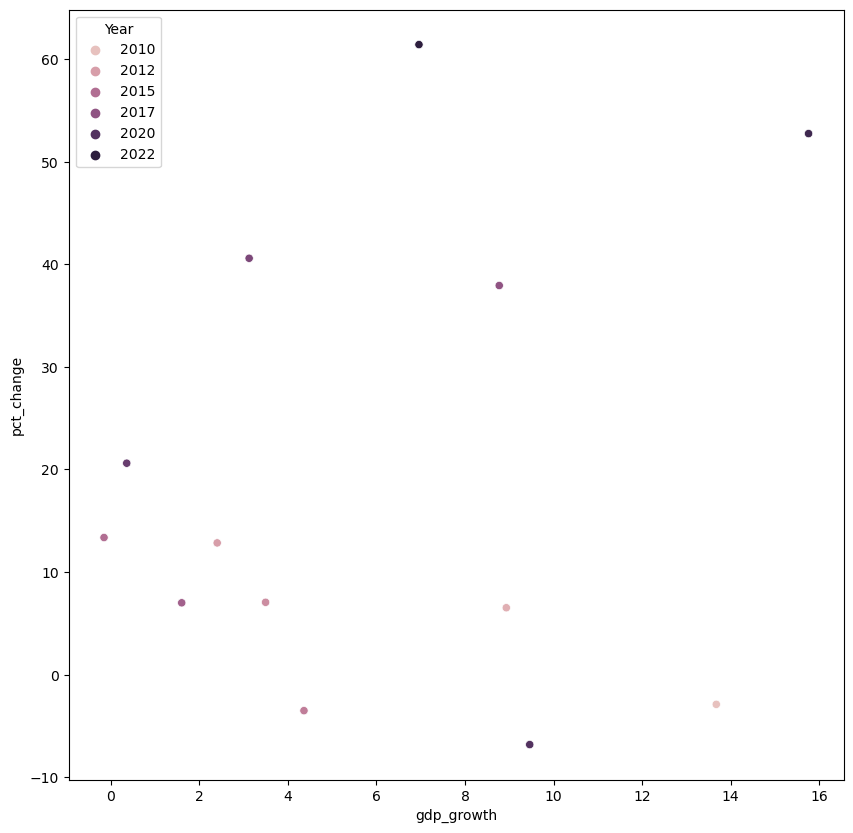

In [26]:
plt.figure(figsize=[10,10])
sns.scatterplot(data=corr_df,y="pct_change",x="gdp_growth",hue="Year")
plt.show()

In [4]:
gdp_df = pd.read_csv("GDP_growth.csv",skip_blank_lines=True,
                     skiprows=4)
gdp_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.035375,6.429817,-0.020479,3.543630,2.116716,5.482371,5.257856,0.635029,-18.589100,17.172509
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,0.237304,7.984460,5.163873,4.583677,5.328044,...,0.838836,4.221358,3.990637,2.976421,2.224016,2.546020,2.510797,2.078473,-2.900490,4.293395
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,12.752287,5.600745,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101,-20.737146
3,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.835056,3.772898,7.282985,5.392705,4.056588,...,5.135584,6.108758,5.930450,2.745137,0.113687,2.305623,2.946175,3.190879,-0.900382,3.965399
4,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,8.540000,4.950000,4.820000,0.940000,-2.580000,-0.150000,-1.316312,-0.700000,-5.600000,1.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,1.712195,5.340908,3.348804,5.916270,5.571757,4.825690,3.406631,4.756831,-5.340275,10.745612
262,"Yemen, Rep.",YEM,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.392990,4.823519,-0.188690,-27.994546,-9.375124,-5.071796,0.752448,NaN,NaN,NaN
263,South Africa,ZAF,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,3.844734,6.177931,7.373709,7.939609,6.122798,...,2.396232,2.485468,1.413826,1.321862,0.664552,1.157947,1.522329,0.303453,-6.342471,4.913097
264,Zambia,ZMB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.361382,-2.490839,3.272393,12.214048,16.647456,...,7.597593,5.057232,4.697992,2.920375,3.776679,3.504336,4.034494,1.441306,-2.785055,4.598734


In [6]:
gdp_df = gdp_df.T.drop(["Indicator Name","Indicator Code"])
header = gdp_df.iloc[0]
gdp_df = gdp_df[1:]
gdp_df.columns = header
gdp_df

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Country Code,ABW,AFE,AFG,AFW,AGO,ALB,AND,ARB,ARE,ARG,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,0.237304,NaN,1.835056,NaN,NaN,NaN,NaN,NaN,5.427843,...,NaN,NaN,NaN,3.789979,NaN,NaN,NaN,3.844734,1.361382,6.316157
1962,NaN,7.98446,NaN,3.772898,NaN,NaN,NaN,NaN,NaN,-0.852022,...,NaN,NaN,NaN,5.316037,NaN,NaN,NaN,6.177931,-2.490839,1.434471
1963,NaN,5.163873,NaN,7.282985,NaN,NaN,NaN,NaN,NaN,-5.308197,...,NaN,NaN,NaN,5.185396,NaN,NaN,NaN,7.373709,3.272393,6.244345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,5.482371,2.54602,2.647003,2.305623,-0.15,3.802227,0.346072,1.056333,0.735069,2.818503,...,-0.735294,6.940188,6.317305,3.384964,1.406282,4.82569,-5.071796,1.157947,3.504336,4.080264
2018,5.257856,2.510797,1.189228,2.946175,-1.316312,4.01936,1.588765,2.383925,1.313914,-2.617396,...,1.904762,7.464991,2.90023,3.285537,-0.609647,3.406631,0.752448,1.522329,4.034494,5.009867
2019,0.635029,2.078473,3.911603,3.190879,-0.7,2.088063,2.015548,1.256279,1.108348,-2.000861,...,2.777778,7.359281,3.241188,2.59129,4.451859,4.756831,NaN,0.303453,1.441306,-6.332446
2020,-18.5891,-2.90049,-2.351101,-0.900382,-5.6,-3.48163,-11.18394,-4.844774,-4.957052,-9.943235,...,-2.147007,2.865412,-5.396254,-3.115404,-3.108444,-5.340275,NaN,-6.342471,-2.785055,-7.816951


In [7]:
gdp_df_clean = gdp_df.rename_axis(" ",axis="columns").drop("Country Code").rename_axis("Year")

In [8]:
gdp_df_clean

,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,0.237304,NaN,1.835056,NaN,NaN,NaN,NaN,NaN,5.427843,...,NaN,NaN,NaN,3.789979,NaN,NaN,NaN,3.844734,1.361382,6.316157
1962,NaN,7.98446,NaN,3.772898,NaN,NaN,NaN,NaN,NaN,-0.852022,...,NaN,NaN,NaN,5.316037,NaN,NaN,NaN,6.177931,-2.490839,1.434471
1963,NaN,5.163873,NaN,7.282985,NaN,NaN,NaN,NaN,NaN,-5.308197,...,NaN,NaN,NaN,5.185396,NaN,NaN,NaN,7.373709,3.272393,6.244345
1964,NaN,4.583677,NaN,5.392705,NaN,NaN,NaN,NaN,NaN,10.130298,...,NaN,NaN,NaN,6.558285,NaN,NaN,NaN,7.939609,12.214048,-1.106172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,5.482371,2.54602,2.647003,2.305623,-0.15,3.802227,0.346072,1.056333,0.735069,2.818503,...,-0.735294,6.940188,6.317305,3.384964,1.406282,4.82569,-5.071796,1.157947,3.504336,4.080264
2018,5.257856,2.510797,1.189228,2.946175,-1.316312,4.01936,1.588765,2.383925,1.313914,-2.617396,...,1.904762,7.464991,2.90023,3.285537,-0.609647,3.406631,0.752448,1.522329,4.034494,5.009867
2019,0.635029,2.078473,3.911603,3.190879,-0.7,2.088063,2.015548,1.256279,1.108348,-2.000861,...,2.777778,7.359281,3.241188,2.59129,4.451859,4.756831,NaN,0.303453,1.441306,-6.332446


In [61]:
gdp_df_clean.to_csv("gdp_growth_data.csv")

In [9]:
us_df = gdp_df_clean.loc[:,"United States"].to_frame()

In [10]:
us_dd = us_df.reset_index()

In [11]:
us_dd["Year"] = pd.to_numeric(us_dd["Year"])

In [12]:
us_dd

,Year,United States
0,1960,NaN
1,1961,2.3
2,1962,6.1
3,1963,4.4
4,1964,5.8
...,...,...
57,2017,2.241921
58,2018,2.945385
59,2019,2.294439
60,2020,-2.767803


In [128]:
corr1_df = us_dd.set_index("Year").join(historical_df.set_index("Year"),how="inner")
corr1_df

,United States,Amount,pct_change
Year,,,
2009,-2.599888,3.425,NaN
2010,2.708857,3.326,-2.890511
2011,1.549895,3.543,6.524354
2012,2.280688,3.998,12.842224
2013,1.841875,4.280,7.053527
2014,2.287776,4.130,-3.504673
2015,2.70637,4.682,13.365617
2016,1.667472,5.010,7.005553
2017,2.241921,6.910,37.924152


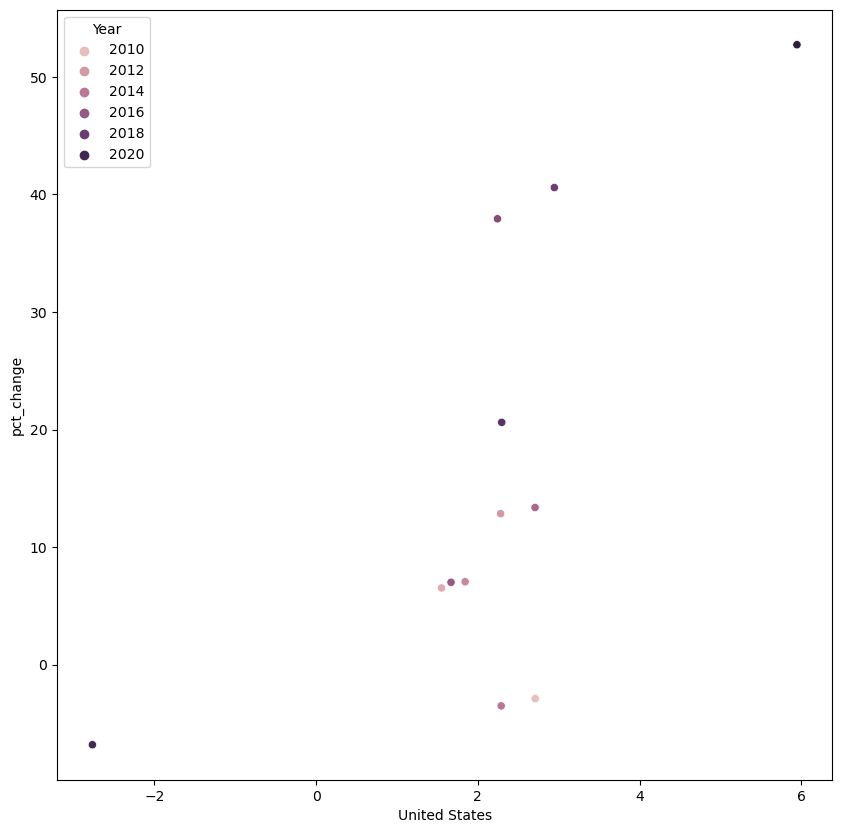

In [129]:
plt.figure(figsize=[10,10])
sns.scatterplot(data=corr1_df,y="pct_change",x="United States",hue="Year")
plt.show()

In [ ]:
gdp_df_clean["China"]

In [131]:
china_df = gdp_df_clean.loc[:,"China"].to_frame()
china_dd = china_df.reset_index()
china_dd["Year"] = pd.to_numeric(china_dd["Year"])
china_dd

,Year,China
0,1960,NaN
1,1961,-27.27
2,1962,-5.58
3,1963,10.3
4,1964,18.18
...,...,...
57,2017,6.947201
58,2018,6.749774
59,2019,5.950501
60,2020,2.239702


In [132]:
corr2_df = china_dd.set_index("Year").join(historical_df.set_index("Year"),how="inner")
corr2_df

,China,Amount,pct_change
Year,,,
2009,9.398726,3.425,NaN
2010,10.635871,3.326,-2.890511
2011,9.550832,3.543,6.524354
2012,7.863736,3.998,12.842224
2013,7.76615,4.280,7.053527
2014,7.425764,4.130,-3.504673
2015,7.041329,4.682,13.365617
2016,6.848762,5.010,7.005553
2017,6.947201,6.910,37.924152


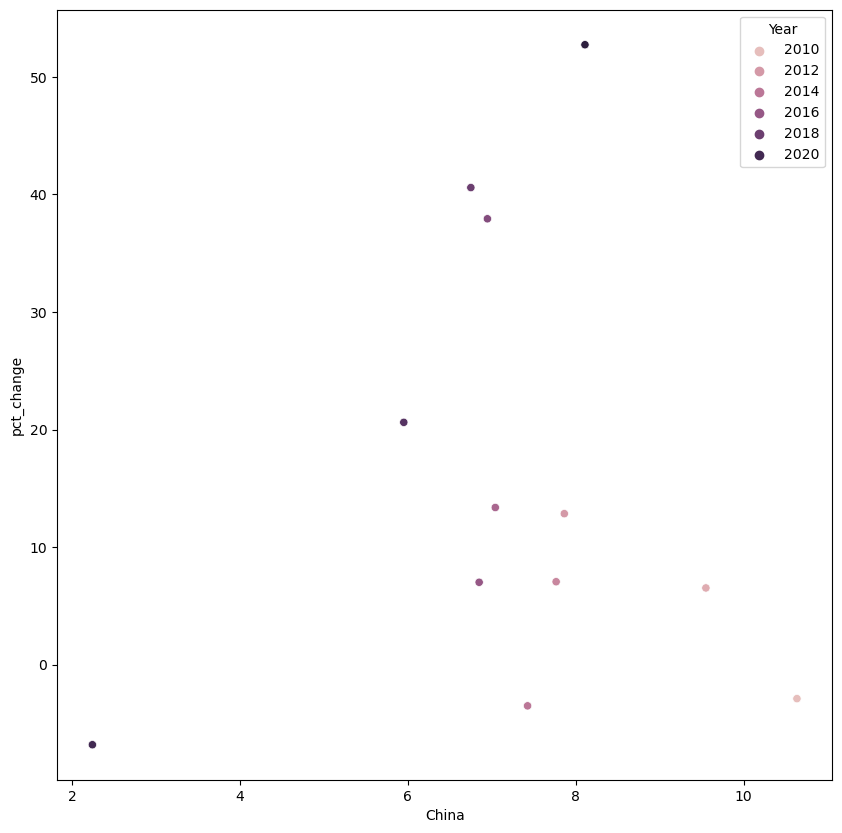

In [134]:
plt.figure(figsize=[10,10])
sns.scatterplot(data=corr2_df,y="pct_change",x="China",hue="Year")
plt.show()

In [135]:
from sklearn.svm import SVR


In [136]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

In [141]:
X = np.array(corr_df["Taiwan GDP"]).reshape(-1, 1)
y = np.array(corr_df["Amount"])

In [ ]:
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

## Web scrapping

In [13]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import sys
# Access page
cik = '0001045810'
type1 = '10-K'
dateb = '20050130'
base_url = "https://www.sec.gov/Archives/edgar/data/1045810/000104581005000008/annualreport.htm"
edgar_resp = requests.get(base_url.format(cik, type, dateb),headers={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.5359.125 Safari/537.36'})
edgar_str = edgar_resp.text
soup = BeautifulSoup(edgar_str, 'html.parser')
t = soup.findAll('table',attrs={"id":"10001"})
#print(t)
trs = t[35].findAll('tr')
list_rev = []
for tr in trs:
    if tr.text:
        #print(list(tr.stripped_strings))
        rev_list = [k.replace("\xa0"," ").replace("\n      "," ") for k in list(tr.stripped_strings)]
        while "$" in rev_list:
            rev_list.remove("$")
        #print(rev_list)
    list_rev.append(rev_list)
nvidia_2005=pd.DataFrame({"Year":["{}".format(c_) for a_, b_, c_ in zip(list_rev[0],list_rev[1],list_rev[2])],list_rev[5][0]:list_rev[5][1:],
          list_rev[6][0]:list_rev[6][1:],list_rev[7][0]:list_rev[7][1:],
          list_rev[8][0]:list_rev[8][1:],list_rev[9][0]:list_rev[9][1:],
          list_rev[10][0]:list_rev[10][1:],list_rev[11][0]:list_rev[11][1:]})
nvidia_2005

,Year,United States,Other Americas,China,Taiwan,Other Asia Pacific,Europe,Total revenue
0,2005,"473,721","11,045","269,306","883,346","169,888","202,727","2,010,033"
1,2004,"444,510","6,359","280,975","834,511","149,843","106,747","1,822,945"
2,2003,"601,952","1,798","242,908","862,238","127,796","72,755","1,909,447"


In [14]:
from bs4 import BeautifulSoup
import requests
import sys
# Access page
cik = '0001045810'
type1 = '10-K'
dateb = '20060129'
base_url = "https://www.sec.gov/Archives/edgar/data/1045810/000104581006000014/fy2006annualreportonform10-k.htm"
edgar_resp = requests.get(base_url.format(cik, type, dateb),headers={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.5359.125 Safari/537.36'})
edgar_str = edgar_resp.text
soup = BeautifulSoup(edgar_str, 'html.parser')
t = soup.findAll('table')
#print(t)
trs = t[108].findAll('tr')
list_rev = []
for tr in trs:
    if tr.text:
        #print(list(tr.stripped_strings))
        rev_list = [k.replace("\xa0"," ").replace("\n      "," ") for k in list(tr.stripped_strings)]
        while "$" in rev_list:
            rev_list.remove("$")
        #print(rev_list)
    list_rev.append(rev_list)
nvidia_2006=pd.DataFrame({"Year":["{}".format(c_) for a_, b_, c_ in zip(list_rev[0],list_rev[1],list_rev[2])],list_rev[5][0]:list_rev[5][1:],
          list_rev[6][0]:list_rev[6][1:],list_rev[7][0]:list_rev[7][1:],
          list_rev[8][0]:list_rev[8][1:],list_rev[9][0]:list_rev[9][1:],
          list_rev[10][0]:list_rev[10][1:],list_rev[11][0]:list_rev[11][1:]})
nvidia_2006

,Year,United States,Other Americas,China,Taiwan,Other Asia Pacific,Europe,Total revenue
0,2006,"340,598","38,572","401,612","1,131,784","250,844","212,277","2,375,687"
1,2005,"473,721","11,045","269,306","883,346","169,888","202,727","2,010,033"
2,2004,"444,510","6,359","280,975","834,511","149,843","106,747","1,822,945"


In [15]:
from bs4 import BeautifulSoup
import requests
import sys
# Access page
cik = '0001045810'
type1 = '10-K'
dateb = '20090125'
base_url = "https://www.sec.gov/Archives/edgar/data/1045810/000104581009000013/fy2009form10k.htm"
edgar_resp = requests.get(base_url.format(cik, type, dateb),headers={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.5359.125 Safari/537.36'})
edgar_str = edgar_resp.text
soup = BeautifulSoup(edgar_str, 'html.parser')
t = soup.findAll('table')
trs = t[151].findAll('tr')
list_rev = []
for tr in trs:
    if tr.text:
        #print(list(tr.stripped_strings))
        rev_list = [k.replace("\xa0"," ").replace("\n      "," ") for k in list(tr.stripped_strings)]
        while "$" in rev_list:
            rev_list.remove("$")
        #print(rev_list)
    list_rev.append(rev_list)
#print(list_rev)
nvidia_2009=pd.DataFrame({"Year":["{}".format(a_) for a_ in list_rev[1][1::2]],
                          list_rev[3][0]:list_rev[3][1:],
          list_rev[4][0]:list_rev[4][1:],list_rev[5][0]:list_rev[5][1:],
          list_rev[6][0]:list_rev[6][1:],list_rev[7][0]:list_rev[7][1:],
          list_rev[8][0]:list_rev[8][1:],list_rev[9][0]:list_rev[9][1:]})
nvidia_2009        

,Year,China,Taiwan,Other Asia Pacific,Europe,United States,Other Americas,Total revenue
0,2009,"1,087,739","974,077","601,480","321,117","309,540","130,906","3,424,859"
1,2008,"1,256,209","1,293,645","662,448","438,321","341,670","105,567","4,097,860"
2,2007,"659,711","1,118,631","544,700","302,080","332,609","111,040","3,068,771"


In [16]:
from bs4 import BeautifulSoup
import requests
import sys
# Access page
cik = '0001045810'
type1 = '10-K'
dateb = '20110130'
base_url = "https://www.sec.gov/Archives/edgar/data/1045810/000104581011000015/fy2011form10k.htm#partiv"
edgar_resp = requests.get(base_url.format(cik, type, dateb),headers={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.5359.125 Safari/537.36'})
edgar_str = edgar_resp.text
soup = BeautifulSoup(edgar_str, 'html.parser')
t = soup.findAll('table')
trs = t[152].findAll('tr')
list_rev = []
for tr in trs:
    if tr.text:
        #print(list(tr.stripped_strings))
        rev_list = [k.replace("\xa0"," ").replace("\n      "," ") for k in list(tr.stripped_strings)]
        while "$" in rev_list:
            rev_list.remove("$")
        #print(rev_list)
    list_rev.append(rev_list)
#print(list_rev)
nvidia_2011=pd.DataFrame({"Year":["{}".format(a_) for a_ in list_rev[1][1::2]],
                          list_rev[3][0]:list_rev[3][1:],
          list_rev[4][0]:list_rev[4][1:],list_rev[5][0]:list_rev[5][1:],
          list_rev[6][0]:list_rev[6][1:],list_rev[7][0]:list_rev[7][1:],
          list_rev[8][0]:list_rev[8][1:],list_rev[9][0]:list_rev[9][1:]})
nvidia_2011  

,Year,China,Taiwan,Other Asia Pacific,Europe,United States,Other Americas,Total revenue
0,2011,"1,223,199","936,797","519,473","261,421","297,265","305,154","3,543,309"
1,2010,"1,304,196","883,137","406,286","203,760","248,793","280,273","3,326,445"
2,2009,"1,087,739","974,077","601,480","321,117","309,540","130,906","3,424,859"


for i in range(4):
    globals()[f"kiki_{i}"] = 3*i
    

In [17]:
from bs4 import BeautifulSoup
import requests
import sys
# Access page
cik = '0001045810'
type1 = '10-K'
dateb = '20140126'
base_url = "https://www.sec.gov/Archives/edgar/data/1045810/000104581014000030/nvda-2014x10k.htm"
edgar_resp = requests.get(base_url.format(cik, type, dateb),headers={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.5359.125 Safari/537.36'})
edgar_str = edgar_resp.text
soup = BeautifulSoup(edgar_str, 'html.parser')
t = soup.findAll('table')
trs = t[194].findAll('tr')
list_rev = []
for tr in trs:
    if tr.text:
        #print(list(tr.stripped_strings))
        rev_list = [k.replace("\xa0"," ").replace("\n      "," ") for k in list(tr.stripped_strings)]
        while "$" in rev_list:
            rev_list.remove("$")
        #print(rev_list)
    list_rev.append(rev_list)
#print(list_rev)
nvidia_2014=pd.DataFrame({"Year":["{}".format(a_) for a_ in list_rev[3][1::2]],
                          list_rev[5][0]:list_rev[5][1:],
          list_rev[6][0]:list_rev[6][1:],list_rev[7][0]:list_rev[7][1:],
          list_rev[8][0]:list_rev[8][1:],list_rev[9][0]:list_rev[9][1:],
          list_rev[10][0]:list_rev[10][1:],list_rev[11][0]:list_rev[11][1:]})
nvidia_2014  

,Year,China,Taiwan,Other Asia Pacific,Europe,United States,Other Americas,Total revenue
0,2014,"793,790","1,321,503","675,339","295,160","726,830","317,540","4,130,162"
1,2013,"780,493","1,356,838","783,573","263,488","799,430","296,337","4,280,159"
2,2012,"941,811","1,137,175","730,975","296,591","596,264","295,114","3,997,930"


In [18]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import sys
# Access page
cik = '0001045810'
type1 = '10-K'
dateb = '20170129'
base_url = "https://www.sec.gov/Archives/edgar/data/1045810/000104581017000027/nvda-2017x10k.htm"
edgar_resp = requests.get(base_url.format(cik, type, dateb),headers={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.5359.125 Safari/537.36'})
edgar_str = edgar_resp.text
soup = BeautifulSoup(edgar_str, 'html.parser')
t = soup.findAll('table')
trs = t[143].findAll('tr')
list_rev = []
for tr in trs:
    if tr.text:
        #print(list(tr.stripped_strings))
        rev_list = [k.replace("\xa0"," ").replace("\n      "," ") for k in list(tr.stripped_strings)]
        while "$" in rev_list:
            rev_list.remove("$")
        #print(rev_list)
    list_rev.append(rev_list)
#print(list_rev)
nvidia_2017=pd.DataFrame({"Year":["{}".format(a_) for a_ in list_rev[3][1::2]],
                          list_rev[6-1][0]:list_rev[6-1][1:],
          list_rev[7-1][0]:list_rev[7-1][1:],list_rev[8-1][0]:list_rev[8-1][1:],
          list_rev[9-1][0]:list_rev[9-1][1:],list_rev[10-1][0]:list_rev[10-1][1:],
          list_rev[11-1][0]:list_rev[11-1][1:],list_rev[12-1][0]:list_rev[12-1][1:]})
nvidia_2017 

,Year,Taiwan,China,Other Asia Pacific,United States,Europe,Other Americas,Total revenue
0,2017,"2,546","1,305","1,010",904,659,486,"6,910"
1,2016,"1,912",806,749,643,482,418,"5,010"
2,2015,"1,594",922,638,791,369,368,"4,682"


In [19]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import sys
# Access page
cik = '0001045810'
type1 = '10-K'
dateb = '20190127'
base_url = "https://www.sec.gov/Archives/edgar/data/1045810/000104581019000023/nvda-2019x10k.htm"
edgar_resp = requests.get(base_url.format(cik, type, dateb),headers={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.5359.125 Safari/537.36'})
edgar_str = edgar_resp.text
soup = BeautifulSoup(edgar_str, 'html.parser')
t = soup.findAll('table')
trs = t[134].findAll('tr')
list_rev = []
for tr in trs:
    if tr.text:
        #print(list(tr.stripped_strings))
        rev_list = [k.replace("\xa0"," ").replace("\n      "," ") for k in list(tr.stripped_strings)]
        while "$" in rev_list:
            rev_list.remove("$")
        #print(rev_list)
    list_rev.append(rev_list)
#print(list_rev)
nvidia_2019=pd.DataFrame({"Year":["{}".format(a_) for a_ in list_rev[3][1::2]],
                          list_rev[6-1][0]:list_rev[6-1][1:],
          list_rev[7-1][0]:list_rev[7-1][1:],list_rev[8-1][0]:list_rev[8-1][1:],
          list_rev[9-1][0]:list_rev[9-1][1:],list_rev[10-1][0]:list_rev[10-1][1:],
          list_rev[11-1][0]:list_rev[11-1][1:],list_rev[12-1][0]:list_rev[12-1][1:]})
#nvidia_2019.columns = nvidia_2017.columns
nvidia_2019

,Year,Taiwan,China (including Hong Kong),Other Asia Pacific,United States,Europe,Other countries,Total revenue
0,2019,"3,360","2,801","2,368","1,506",914,767,"11,716"
1,2018,"2,991","1,896","2,066","1,274",768,719,"9,714"
2,2017,"2,546","1,305","1,010",904,659,486,"6,910"


In [20]:
nvidia_2019.columns=nvidia_2017.columns
nvidia_2019

,Year,Taiwan,China,Other Asia Pacific,United States,Europe,Other Americas,Total revenue
0,2019,"3,360","2,801","2,368","1,506",914,767,"11,716"
1,2018,"2,991","1,896","2,066","1,274",768,719,"9,714"
2,2017,"2,546","1,305","1,010",904,659,486,"6,910"


In [21]:
api_key = "4637bab9029f567ee08afb01589b090d3ec051378e41ceed9f2e7ea78d1726e6"
import requests
import json
import pandas as pd

# 10-Q filing URL of Apple
filing_url = "https://www.sec.gov/ix?doc=/Archives/edgar/data/1045810/000104581021000010/nvda-20210131.htm"

# XBRL-to-JSON converter API endpoint
xbrl_converter_api_endpoint = "https://api.sec-api.io/xbrl-to-json"

final_url = xbrl_converter_api_endpoint + "?htm-url=" + filing_url + "&token=" + api_key

# make request to the API
response = requests.get(final_url)

# load JSON into memory
xbrl_json = json.loads(response.text)

In [22]:
json_df = xbrl_json['SegmentInformationRevenueandLonglivedAssetsbyRegionDetails']['RevenueFromContractWithCustomerExcludingAssessedTax']

In [23]:
region = set()
for data in json_df:
    if "segment" in data.keys():
        if isinstance(data["segment"],dict) and data["segment"]["dimension"] == "srt:StatementGeographicalAxis":
            region.add(data["segment"]["value"])
            #print(data["segment"]["value"])
region

{'country:CN',
 'country:TW',
 'country:US',
 'nvda:OtherAsiaPacificMember',
 'nvda:OtherCountriesMember',
 'srt:EuropeMember'}

In [24]:
json_data = pd.DataFrame.from_dict(pd.json_normalize(json_df),orient="columns")

In [25]:
json_data[json_data['segment.value'].isin(list(region))]

,decimals,unitRef,value,period.startDate,period.endDate,segment,segment.dimension,segment.value
12,-6,usd,4531000000,2020-01-27,2021-01-31,NaN,srt:StatementGeographicalAxis,country:TW
13,-6,usd,3025000000,2019-01-28,2020-01-26,NaN,srt:StatementGeographicalAxis,country:TW
14,-6,usd,3360000000,2018-01-29,2019-01-27,NaN,srt:StatementGeographicalAxis,country:TW
15,-6,usd,3886000000,2020-01-27,2021-01-31,NaN,srt:StatementGeographicalAxis,country:CN
16,-6,usd,2731000000,2019-01-28,2020-01-26,NaN,srt:StatementGeographicalAxis,country:CN
17,-6,usd,2801000000,2018-01-29,2019-01-27,NaN,srt:StatementGeographicalAxis,country:CN
18,-6,usd,3214000000,2020-01-27,2021-01-31,NaN,srt:StatementGeographicalAxis,country:US
19,-6,usd,886000000,2019-01-28,2020-01-26,NaN,srt:StatementGeographicalAxis,country:US
20,-6,usd,1506000000,2018-01-29,2019-01-27,NaN,srt:StatementGeographicalAxis,country:US
21,-6,usd,3093000000,2020-01-27,2021-01-31,NaN,srt:StatementGeographicalAxis,nvda:OtherAsiaPacificMember


In [26]:
nvidia_2020_uncleaned = pd.pivot(json_data[json_data['segment.value'].isin(list(region))],index="period.startDate",columns="segment.value",values="value")
nvidia_2020_uncleaned

segment.value,country:CN,country:TW,country:US,nvda:OtherAsiaPacificMember,nvda:OtherCountriesMember,srt:EuropeMember
period.startDate,,,,,,
2018-01-29,2801000000,3360000000,1506000000,2368000000,767000000,914000000
2019-01-28,2731000000,3025000000,886000000,2685000000,599000000,992000000
2020-01-27,3886000000,4531000000,3214000000,3093000000,833000000,1118000000


In [27]:
nvidia_2020_uncleaned=nvidia_2020_uncleaned.reset_index()

In [28]:
nvidia_2020_uncleaned=nvidia_2020_uncleaned.rename_axis("",axis="columns")

In [29]:
nvidia_2020_uncleaned["period.startDate"] = nvidia_2020_uncleaned["period.startDate"].map(lambda x:x[:4])

In [30]:
nvidia_2020_uncleaned

,period.startDate,country:CN,country:TW,country:US,nvda:OtherAsiaPacificMember,nvda:OtherCountriesMember,srt:EuropeMember
0,2018,2801000000,3360000000,1506000000,2368000000,767000000,914000000
1,2019,2731000000,3025000000,886000000,2685000000,599000000,992000000
2,2020,3886000000,4531000000,3214000000,3093000000,833000000,1118000000


In [31]:
colnames = ['Year', 'United States', 'Other Americas', 'China', 'Taiwan',
            'Other Asia Pacific', 'Europe', 'Total revenue']

In [32]:
nvidia_2020 = nvidia_2020_uncleaned.rename(columns={"period.startDate":colnames[0],"country:CN":colnames[3],"country:TW":colnames[4],"country:US":colnames[1],
                                                   "nvda:OtherAsiaPacificMember":colnames[5],"nvda:OtherCountriesMember":"Other Countries",
                                                    "srt:EuropeMember":colnames[6]})
nvidia_2020

,Year,China,Taiwan,United States,Other Asia Pacific,Other Countries,Europe
0,2018,2801000000,3360000000,1506000000,2368000000,767000000,914000000
1,2019,2731000000,3025000000,886000000,2685000000,599000000,992000000
2,2020,3886000000,4531000000,3214000000,3093000000,833000000,1118000000


In [33]:
for i in [2005,2006,2009,2011,2014,2017,2019]:
    globals()[f"nvidia_{i}"]= globals()[f"nvidia_{i}"].reindex(sorted(globals()[f"nvidia_{i}"].columns), axis=1)

In [34]:
for i in [2005,2006,2009,2011,2014,2017,2019]:
    print(globals()[f"nvidia_{i}"])

     China   Europe Other Americas Other Asia Pacific   Taiwan Total revenue  \
0  269,306  202,727         11,045            169,888  883,346     2,010,033   
1  280,975  106,747          6,359            149,843  834,511     1,822,945   
2  242,908   72,755          1,798            127,796  862,238     1,909,447   

  United States  Year  
0       473,721  2005  
1       444,510  2004  
2       601,952  2003  
     China   Europe Other           Americas Other           Asia Pacific  \
0  401,612  212,277                   38,572                      250,844   
1  269,306  202,727                   11,045                      169,888   
2  280,975  106,747                    6,359                      149,843   

      Taiwan Total           revenue United           States  Year  
0  1,131,784               2,375,687                 340,598  2006  
1    883,346               2,010,033                 473,721  2005  
2    834,511               1,822,945                 444,510  2004 

In [35]:
for i in [2005,2006,2009,2011,2014,2017,2019]:
    globals()[f"nvidia_{i}"].columns = nvidia_2005.columns

In [36]:
for i in [2005,2006,2009,2011,2014,2017,2019]:
    globals()[f"nvidia_{i}"]["ROW"] = globals()[f"nvidia_{i}"]["Other Americas"].map(lambda x:x.replace(",","")).astype(int) + globals()[f"nvidia_{i}"]["Europe"].map(lambda x:x.replace(",","")).astype(int)

In [37]:
nvidia_2014.columns

Index(['China', 'Europe', 'Other Americas', 'Other Asia Pacific', 'Taiwan',
       'Total revenue', 'United States', 'Year', 'ROW'],
      dtype='object')

In [38]:
nvidia_2014

,China,Europe,Other Americas,Other Asia Pacific,Taiwan,Total revenue,United States,Year,ROW
0,"793,790","295,160","317,540","675,339","1,321,503","4,130,162","726,830",2014,612700
1,"780,493","263,488","296,337","783,573","1,356,838","4,280,159","799,430",2013,559825
2,"941,811","296,591","295,114","730,975","1,137,175","3,997,930","596,264",2012,591705


In [39]:
for i in [2005,2006,2009,2011,2014,2017,2019]:
    for j in nvidia_2005.columns[:-2]:
        globals()[f"nvidia_{i}"][j] = globals()[f"nvidia_{i}"][j].map(lambda x:x.replace(",","")).astype(int)

In [40]:
nvidia_2014

,China,Europe,Other Americas,Other Asia Pacific,Taiwan,Total revenue,United States,Year,ROW
0,793790,295160,317540,675339,1321503,4130162,726830,2014,612700
1,780493,263488,296337,783573,1356838,4280159,799430,2013,559825
2,941811,296591,295114,730975,1137175,3997930,596264,2012,591705


In [41]:
colly = list(nvidia_2005.columns)
colly.remove('Year')
colly

['China',
 'Europe',
 'Other Americas',
 'Other Asia Pacific',
 'Taiwan',
 'Total revenue',
 'United States',
 'ROW']

In [42]:
for i in [2005,2006,2009,2011,2014,2017,2019]:
    for j in colly:
        globals()[f"nvidia_{i}"][j] = globals()[f"nvidia_{i}"][j].map(lambda x:x*1000)

In [43]:
nvidia_2014

,China,Europe,Other Americas,Other Asia Pacific,Taiwan,Total revenue,United States,Year,ROW
0,793790000,295160000,317540000,675339000,1321503000,4130162000,726830000,2014,612700000
1,780493000,263488000,296337000,783573000,1356838000,4280159000,799430000,2013,559825000
2,941811000,296591000,295114000,730975000,1137175000,3997930000,596264000,2012,591705000


In [44]:
nvidia_2019

,China,Europe,Other Americas,Other Asia Pacific,Taiwan,Total revenue,United States,Year,ROW
0,2801000,914000,767000,2368000,3360000,11716000,1506000,2019,1681000
1,1896000,768000,719000,2066000,2991000,9714000,1274000,2018,1487000
2,1305000,659000,486000,1010000,2546000,6910000,904000,2017,1145000


In [45]:
nvidia_05_19=pd.concat([nvidia_2005,nvidia_2006,nvidia_2009,nvidia_2011,nvidia_2014,nvidia_2017,nvidia_2019],ignore_index=True)
nvidia_05_19

,China,Europe,Other Americas,Other Asia Pacific,Taiwan,Total revenue,United States,Year,ROW
0,269306000,202727000,11045000,169888000,883346000,2010033000,473721000,2005,213772000
1,280975000,106747000,6359000,149843000,834511000,1822945000,444510000,2004,113106000
2,242908000,72755000,1798000,127796000,862238000,1909447000,601952000,2003,74553000
3,401612000,212277000,38572000,250844000,1131784000,2375687000,340598000,2006,250849000
4,269306000,202727000,11045000,169888000,883346000,2010033000,473721000,2005,213772000
5,280975000,106747000,6359000,149843000,834511000,1822945000,444510000,2004,113106000
6,1087739000,321117000,130906000,601480000,974077000,3424859000,309540000,2009,452023000
7,1256209000,438321000,105567000,662448000,1293645000,4097860000,341670000,2008,543888000
8,659711000,302080000,111040000,544700000,1118631000,3068771000,332609000,2007,413120000
9,1223199000,261421000,305154000,519473000,936797000,3543309000,297265000,2011,566575000


In [46]:
nvidia_05_19=nvidia_05_19.drop_duplicates(ignore_index=True)
nvidia_05_19=nvidia_05_19.sort_values(by=["Year"],ignore_index=True)

In [47]:
nvidia_05_19

,China,Europe,Other Americas,Other Asia Pacific,Taiwan,Total revenue,United States,Year,ROW
0,242908000,72755000,1798000,127796000,862238000,1909447000,601952000,2003,74553000
1,280975000,106747000,6359000,149843000,834511000,1822945000,444510000,2004,113106000
2,269306000,202727000,11045000,169888000,883346000,2010033000,473721000,2005,213772000
3,401612000,212277000,38572000,250844000,1131784000,2375687000,340598000,2006,250849000
4,659711000,302080000,111040000,544700000,1118631000,3068771000,332609000,2007,413120000
5,1256209000,438321000,105567000,662448000,1293645000,4097860000,341670000,2008,543888000
6,1087739000,321117000,130906000,601480000,974077000,3424859000,309540000,2009,452023000
7,1304196000,203760000,280273000,406286000,883137000,3326445000,248793000,2010,484033000
8,1223199000,261421000,305154000,519473000,936797000,3543309000,297265000,2011,566575000
9,941811000,296591000,295114000,730975000,1137175000,3997930000,596264000,2012,591705000


In [48]:
colly = list(nvidia_05_19.columns)
colly.remove('Year')
colly

['China',
 'Europe',
 'Other Americas',
 'Other Asia Pacific',
 'Taiwan',
 'Total revenue',
 'United States',
 'ROW']

In [49]:
nvidia_05_19.loc[12:,colly]= nvidia_05_19.loc[12:,colly]*1000
nvidia_05_19.loc[12:,colly]

,China,Europe,Other Americas,Other Asia Pacific,Taiwan,Total revenue,United States,ROW
12,922000000,369000000,368000000,638000000,1594000000,4682000000,791000000,737000000
13,806000000,482000000,418000000,749000000,1912000000,5010000000,643000000,900000000
14,1305000000,659000000,486000000,1010000000,2546000000,6910000000,904000000,1145000000
15,1896000000,768000000,719000000,2066000000,2991000000,9714000000,1274000000,1487000000
16,2801000000,914000000,767000000,2368000000,3360000000,11716000000,1506000000,1681000000


In [50]:
nvidia_05_19.loc[:,"Year"] = nvidia_05_19.loc[:,"Year"].map(lambda x: int(x)-1)
nvidia_05_19

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12268\1917447385.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  nvidia_05_19.loc[:,"Year"] = nvidia_05_19.loc[:,"Year"].map(lambda x: int(x)-1)


,China,Europe,Other Americas,Other Asia Pacific,Taiwan,Total revenue,United States,Year,ROW
0,242908000,72755000,1798000,127796000,862238000,1909447000,601952000,2002,74553000
1,280975000,106747000,6359000,149843000,834511000,1822945000,444510000,2003,113106000
2,269306000,202727000,11045000,169888000,883346000,2010033000,473721000,2004,213772000
3,401612000,212277000,38572000,250844000,1131784000,2375687000,340598000,2005,250849000
4,659711000,302080000,111040000,544700000,1118631000,3068771000,332609000,2006,413120000
5,1256209000,438321000,105567000,662448000,1293645000,4097860000,341670000,2007,543888000
6,1087739000,321117000,130906000,601480000,974077000,3424859000,309540000,2008,452023000
7,1304196000,203760000,280273000,406286000,883137000,3326445000,248793000,2009,484033000
8,1223199000,261421000,305154000,519473000,936797000,3543309000,297265000,2010,566575000
9,941811000,296591000,295114000,730975000,1137175000,3997930000,596264000,2011,591705000


<AxesSubplot: xlabel='Year'>

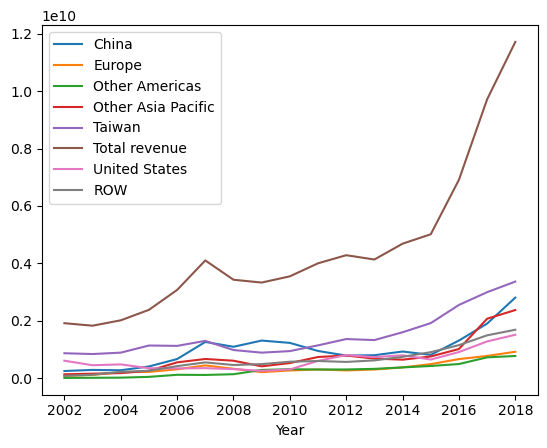

In [51]:
nvidia_05_19.set_index("Year").plot()

In [61]:
nvidia_2020

,Year,China,Taiwan,United States,Other Asia Pacific,Other Countries,Europe
0,2018,2801000000,3360000000,1506000000,2368000000,767000000,914000000
1,2019,2731000000,3025000000,886000000,2685000000,599000000,992000000
2,2020,3886000000,4531000000,3214000000,3093000000,833000000,1118000000


In [68]:
nvidia_05_19.iloc[-4:,:]

,China,Europe,Other Americas,Other Asia Pacific,Taiwan,Total revenue,United States,Year,ROW
13,806000000,482000000,418000000,749000000,1912000000,5010000000,643000000,2015,900000000
14,1305000000,659000000,486000000,1010000000,2546000000,6910000000,904000000,2016,1145000000
15,1896000000,768000000,719000000,2066000000,2991000000,9714000000,1274000000,2017,1487000000
16,2801000000,914000000,767000000,2368000000,3360000000,11716000000,1506000000,2018,1681000000


In [66]:
nvidia_05_19.columns

Index(['China', 'Europe', 'Other Americas', 'Other Asia Pacific', 'Taiwan',
       'Total revenue', 'United States', 'Year', 'ROW'],
      dtype='object')

In [67]:
nvidia_2020.columns

Index(['Year', 'China', 'Taiwan', 'United States', 'Other Asia Pacific',
       'Other Countries', 'Europe'],
      dtype='object', name='')

In [52]:
coly_20 = ['China', 'Taiwan', 'United States', 'Other Asia Pacific', 'Other Countries', 'Europe']
for i in coly_20:
    nvidia_2020[i] = nvidia_2020[i].astype(dtype='int64')
nvidia_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                3 non-null      object
 1   China               3 non-null      int64 
 2   Taiwan              3 non-null      int64 
 3   United States       3 non-null      int64 
 4   Other Asia Pacific  3 non-null      int64 
 5   Other Countries     3 non-null      int64 
 6   Europe              3 non-null      int64 
dtypes: int64(6), object(1)
memory usage: 296.0+ bytes


In [53]:
nvidia_2020 = nvidia_2020.rename(columns={'Other Countries':'Other Americas'})
nvidia_2020

,Year,China,Taiwan,United States,Other Asia Pacific,Other Americas,Europe
0,2018,2801000000,3360000000,1506000000,2368000000,767000000,914000000
1,2019,2731000000,3025000000,886000000,2685000000,599000000,992000000
2,2020,3886000000,4531000000,3214000000,3093000000,833000000,1118000000


In [54]:
nvidia_2020['ROW'] = nvidia_2020['Europe'] + nvidia_2020['Other Americas']
nvidia_2020

,Year,China,Taiwan,United States,Other Asia Pacific,Other Americas,Europe,ROW
0,2018,2801000000,3360000000,1506000000,2368000000,767000000,914000000,1681000000
1,2019,2731000000,3025000000,886000000,2685000000,599000000,992000000,1591000000
2,2020,3886000000,4531000000,3214000000,3093000000,833000000,1118000000,1951000000


In [76]:
nvidia_05_19

,China,Europe,Other Americas,Other Asia Pacific,Taiwan,Total revenue,United States,Year,ROW
0,242908000,72755000,1798000,127796000,862238000,1909447000,601952000,2002,74553000
1,280975000,106747000,6359000,149843000,834511000,1822945000,444510000,2003,113106000
2,269306000,202727000,11045000,169888000,883346000,2010033000,473721000,2004,213772000
3,401612000,212277000,38572000,250844000,1131784000,2375687000,340598000,2005,250849000
4,659711000,302080000,111040000,544700000,1118631000,3068771000,332609000,2006,413120000
5,1256209000,438321000,105567000,662448000,1293645000,4097860000,341670000,2007,543888000
6,1087739000,321117000,130906000,601480000,974077000,3424859000,309540000,2008,452023000
7,1304196000,203760000,280273000,406286000,883137000,3326445000,248793000,2009,484033000
8,1223199000,261421000,305154000,519473000,936797000,3543309000,297265000,2010,566575000
9,941811000,296591000,295114000,730975000,1137175000,3997930000,596264000,2011,591705000


In [55]:
selected_cols = ['China', 'Europe', 'Other Americas', 'Other Asia Pacific', 'Taiwan', 'United States', 'Year', 'ROW']
nvidia_df = pd.concat([nvidia_05_19[selected_cols],nvidia_2020[selected_cols]])
nvidia_df

,China,Europe,Other Americas,Other Asia Pacific,Taiwan,United States,Year,ROW
0,242908000,72755000,1798000,127796000,862238000,601952000,2002,74553000
1,280975000,106747000,6359000,149843000,834511000,444510000,2003,113106000
2,269306000,202727000,11045000,169888000,883346000,473721000,2004,213772000
3,401612000,212277000,38572000,250844000,1131784000,340598000,2005,250849000
4,659711000,302080000,111040000,544700000,1118631000,332609000,2006,413120000
5,1256209000,438321000,105567000,662448000,1293645000,341670000,2007,543888000
6,1087739000,321117000,130906000,601480000,974077000,309540000,2008,452023000
7,1304196000,203760000,280273000,406286000,883137000,248793000,2009,484033000
8,1223199000,261421000,305154000,519473000,936797000,297265000,2010,566575000
9,941811000,296591000,295114000,730975000,1137175000,596264000,2011,591705000


In [56]:
nvidia_df=nvidia_df.drop(16).reset_index(drop=True)
nvidia_df

,China,Europe,Other Americas,Other Asia Pacific,Taiwan,United States,Year,ROW
0,242908000,72755000,1798000,127796000,862238000,601952000,2002,74553000
1,280975000,106747000,6359000,149843000,834511000,444510000,2003,113106000
2,269306000,202727000,11045000,169888000,883346000,473721000,2004,213772000
3,401612000,212277000,38572000,250844000,1131784000,340598000,2005,250849000
4,659711000,302080000,111040000,544700000,1118631000,332609000,2006,413120000
5,1256209000,438321000,105567000,662448000,1293645000,341670000,2007,543888000
6,1087739000,321117000,130906000,601480000,974077000,309540000,2008,452023000
7,1304196000,203760000,280273000,406286000,883137000,248793000,2009,484033000
8,1223199000,261421000,305154000,519473000,936797000,297265000,2010,566575000
9,941811000,296591000,295114000,730975000,1137175000,596264000,2011,591705000


<AxesSubplot: xlabel='Year'>

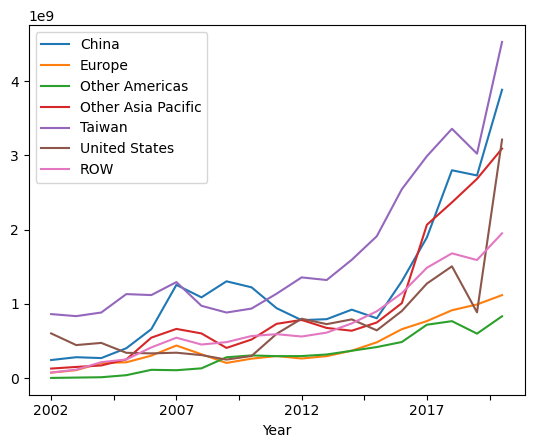

In [90]:
nvidia_df.set_index("Year").plot()

In [57]:
pct_cols = ['China', 'Europe', 'Other Americas', 'Other Asia Pacific', 'Taiwan', 'United States', 'ROW']
for i in pct_cols:
    nvidia_df[f"{i}_growth_rate (%)"] = (nvidia_df[i]/nvidia_df[i].shift(1)-1)*100

In [58]:
nvidia_df

,China,Europe,Other Americas,Other Asia Pacific,Taiwan,United States,Year,ROW,China_growth_rate (%),Europe_growth_rate (%),Other Americas_growth_rate (%),Other Asia Pacific_growth_rate (%),Taiwan_growth_rate (%),United States_growth_rate (%),ROW_growth_rate (%)
0,242908000,72755000,1798000,127796000,862238000,601952000,2002,74553000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,280975000,106747000,6359000,149843000,834511000,444510000,2003,113106000,15.671365,46.721188,253.670745,17.251714,-3.215701,-26.155242,51.712205
2,269306000,202727000,11045000,169888000,883346000,473721000,2004,213772000,-4.153039,89.913534,73.690832,13.377335,5.851930,6.571506,89.001468
3,401612000,212277000,38572000,250844000,1131784000,340598000,2005,250849000,49.128501,4.710769,249.225894,47.652571,28.124653,-28.101562,17.344180
4,659711000,302080000,111040000,544700000,1118631000,332609000,2006,413120000,64.265759,42.304630,187.877217,117.146912,-1.162148,-2.345580,64.688717
5,1256209000,438321000,105567000,662448000,1293645000,341670000,2007,543888000,90.418077,45.100967,-4.928854,21.617037,15.645374,2.724220,31.653757
6,1087739000,321117000,130906000,601480000,974077000,309540000,2008,452023000,-13.410985,-26.739307,24.002766,-9.203439,-24.702913,-9.403811,-16.890426
7,1304196000,203760000,280273000,406286000,883137000,248793000,2009,484033000,19.899719,-36.546492,114.102486,-32.452284,-9.336018,-19.624927,7.081498
8,1223199000,261421000,305154000,519473000,936797000,297265000,2010,566575000,-6.210493,28.298488,8.877416,27.858947,6.076067,19.482863,17.052970
9,941811000,296591000,295114000,730975000,1137175000,596264000,2011,591705000,-23.004270,13.453395,-3.290142,40.714724,21.389693,100.583318,4.435423


In [59]:
#nvidia_df.to_csv("nvidia_revenue_growth.csv")

<AxesSubplot: xlabel='Year'>

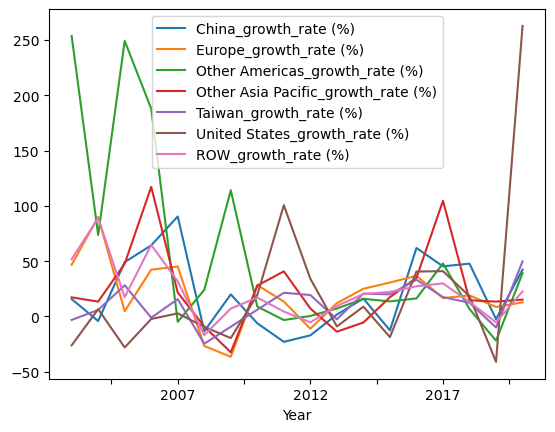

In [60]:
nvidia_df.loc[:,~nvidia_df.columns.isin(pct_cols)].set_index("Year").plot()

In [70]:
us_dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           62 non-null     int64 
 1   United States  61 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [72]:
us_dd["United States"] = us_dd["United States"].astype(float)
us_dd

,Year,United States
0,1960,NaN
1,1961,2.300000
2,1962,6.100000
3,1963,4.400000
4,1964,5.800000
...,...,...
57,2017,2.241921
58,2018,2.945385
59,2019,2.294439
60,2020,-2.767803


In [75]:
us_growth = us_dd[(us_dd["Year"]>=2002) & (us_dd["Year"]!=2021)]

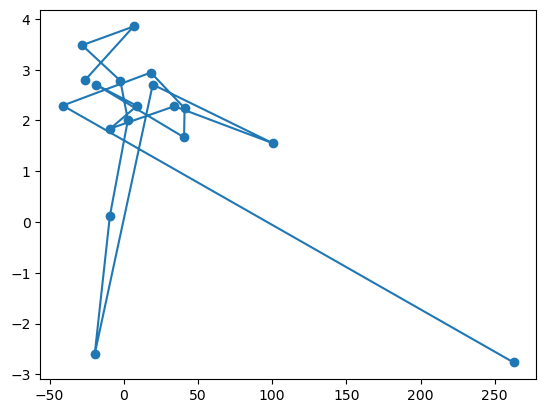

In [83]:
plt.scatter(x = nvidia_df["United States_growth_rate (%)"],y = us_growth["United States"])
plt.plot(nvidia_df["United States_growth_rate (%)"],us_growth["United States"])
plt.show()

In [78]:
nvidia_df["United States_growth_rate (%)"]

0            NaN
1     -26.155242
2       6.571506
3     -28.101562
4      -2.345580
5       2.724220
6      -9.403811
7     -19.624927
8      19.482863
9     100.583318
10     34.073162
11     -9.081471
12      8.828750
13    -18.710493
14     40.590980
15     40.929204
16     18.210361
17    -41.168659
18    262.753950
Name: United States_growth_rate (%), dtype: float64

In [79]:
us_growth["United States"]

42    1.695943
43    2.796209
44    3.852553
45    3.483220
46    2.782811
47    2.010508
48    0.122188
49   -2.599888
50    2.708857
51    1.549895
52    2.280688
53    1.841875
54    2.287776
55    2.706370
56    1.667472
57    2.241921
58    2.945385
59    2.294439
60   -2.767803
Name: United States, dtype: float64

In [3]:
nvidia_df = pd.read_csv("nvidia_revenue_growth.csv",index_col=0)
nvidia_df

,China,Europe,Other Americas,Other Asia Pacific,Taiwan,United States,Year,ROW,China_growth_rate (%),Europe_growth_rate (%),Other Americas_growth_rate (%),Other Asia Pacific_growth_rate (%),Taiwan_growth_rate (%),United States_growth_rate (%),ROW_growth_rate (%)
0,242908000,72755000,1798000,127796000,862238000,601952000,2002,74553000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,280975000,106747000,6359000,149843000,834511000,444510000,2003,113106000,15.671365,46.721188,253.670745,17.251714,-3.215701,-26.155242,51.712205
2,269306000,202727000,11045000,169888000,883346000,473721000,2004,213772000,-4.153039,89.913534,73.690832,13.377335,5.851930,6.571506,89.001468
3,401612000,212277000,38572000,250844000,1131784000,340598000,2005,250849000,49.128501,4.710769,249.225894,47.652571,28.124653,-28.101562,17.344180
4,659711000,302080000,111040000,544700000,1118631000,332609000,2006,413120000,64.265759,42.304630,187.877217,117.146912,-1.162148,-2.345580,64.688717
5,1256209000,438321000,105567000,662448000,1293645000,341670000,2007,543888000,90.418077,45.100967,-4.928854,21.617037,15.645374,2.724220,31.653757
6,1087739000,321117000,130906000,601480000,974077000,309540000,2008,452023000,-13.410985,-26.739307,24.002766,-9.203439,-24.702913,-9.403811,-16.890426
7,1304196000,203760000,280273000,406286000,883137000,248793000,2009,484033000,19.899719,-36.546492,114.102486,-32.452284,-9.336018,-19.624927,7.081498
8,1223199000,261421000,305154000,519473000,936797000,297265000,2010,566575000,-6.210493,28.298488,8.877416,27.858947,6.076067,19.482863,17.052970
9,941811000,296591000,295114000,730975000,1137175000,596264000,2011,591705000,-23.004270,13.453395,-3.290142,40.714724,21.389693,100.583318,4.435423


In [6]:
np.prod(np.square(1 + nvidia_df["United States_growth_rate (%)"]/100))**(1/(len(nvidia_df["United States_growth_rate (%)"])-1)) - 1

0.20456865186263706

In [12]:
nvidia_df["Total Revenue"] = nvidia_df.iloc[:,:6].sum(axis=1)

In [15]:
nvidia_df = nvidia_df.drop("%age sales",axis = 1)
nvidia_df

,China,Europe,Other Americas,Other Asia Pacific,Taiwan,United States,Year,ROW,China_growth_rate (%),Europe_growth_rate (%),Other Americas_growth_rate (%),Other Asia Pacific_growth_rate (%),Taiwan_growth_rate (%),United States_growth_rate (%),ROW_growth_rate (%),Total Revenue
0,242908000,72755000,1798000,127796000,862238000,601952000,2002,74553000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909447000
1,280975000,106747000,6359000,149843000,834511000,444510000,2003,113106000,15.671365,46.721188,253.670745,17.251714,-3.215701,-26.155242,51.712205,1822945000
2,269306000,202727000,11045000,169888000,883346000,473721000,2004,213772000,-4.153039,89.913534,73.690832,13.377335,5.851930,6.571506,89.001468,2010033000
3,401612000,212277000,38572000,250844000,1131784000,340598000,2005,250849000,49.128501,4.710769,249.225894,47.652571,28.124653,-28.101562,17.344180,2375687000
4,659711000,302080000,111040000,544700000,1118631000,332609000,2006,413120000,64.265759,42.304630,187.877217,117.146912,-1.162148,-2.345580,64.688717,3068771000
5,1256209000,438321000,105567000,662448000,1293645000,341670000,2007,543888000,90.418077,45.100967,-4.928854,21.617037,15.645374,2.724220,31.653757,4097860000
6,1087739000,321117000,130906000,601480000,974077000,309540000,2008,452023000,-13.410985,-26.739307,24.002766,-9.203439,-24.702913,-9.403811,-16.890426,3424859000
7,1304196000,203760000,280273000,406286000,883137000,248793000,2009,484033000,19.899719,-36.546492,114.102486,-32.452284,-9.336018,-19.624927,7.081498,3326445000
8,1223199000,261421000,305154000,519473000,936797000,297265000,2010,566575000,-6.210493,28.298488,8.877416,27.858947,6.076067,19.482863,17.052970,3543309000
9,941811000,296591000,295114000,730975000,1137175000,596264000,2011,591705000,-23.004270,13.453395,-3.290142,40.714724,21.389693,100.583318,4.435423,3997930000


In [16]:
pct_cols = ['China', 'Europe', 'Other Americas', 'Other Asia Pacific', 'Taiwan', 'United States', 'ROW']
for i in pct_cols:
    nvidia_df[f"{i}_sales_share (%)"] = (nvidia_df[i]/nvidia_df["Total Revenue"])*100
nvidia_df

,China,Europe,Other Americas,Other Asia Pacific,Taiwan,United States,Year,ROW,China_growth_rate (%),Europe_growth_rate (%),...,United States_growth_rate (%),ROW_growth_rate (%),Total Revenue,China_sales_share (%),Europe_sales_share (%),Other Americas_sales_share (%),Other Asia Pacific_sales_share (%),Taiwan_sales_share (%),United States_sales_share (%),ROW_sales_share (%)
0,242908000,72755000,1798000,127796000,862238000,601952000,2002,74553000,NaN,NaN,...,NaN,NaN,1909447000,12.721380,3.810265,0.094163,6.692828,45.156425,31.524939,3.904429
1,280975000,106747000,6359000,149843000,834511000,444510000,2003,113106000,15.671365,46.721188,...,-26.155242,51.712205,1822945000,15.413246,5.855744,0.348831,8.219831,45.778178,24.384170,6.204576
2,269306000,202727000,11045000,169888000,883346000,473721000,2004,213772000,-4.153039,89.913534,...,6.571506,89.001468,2010033000,13.398088,10.085755,0.549493,8.452001,43.946841,23.567822,10.635248
3,401612000,212277000,38572000,250844000,1131784000,340598000,2005,250849000,49.128501,4.710769,...,-28.101562,17.344180,2375687000,16.905089,8.935394,1.623615,10.558798,47.640283,14.336821,10.559009
4,659711000,302080000,111040000,544700000,1118631000,332609000,2006,413120000,64.265759,42.304630,...,-2.345580,64.688717,3068771000,21.497564,9.843680,3.618387,17.749777,36.452085,10.838508,13.462067
5,1256209000,438321000,105567000,662448000,1293645000,341670000,2007,543888000,90.418077,45.100967,...,2.724220,31.653757,4097860000,30.655244,10.696339,2.576150,16.165706,31.568794,8.337767,13.272489
6,1087739000,321117000,130906000,601480000,974077000,309540000,2008,452023000,-13.410985,-26.739307,...,-9.403811,-16.890426,3424859000,31.760110,9.376065,3.822230,17.562183,28.441375,9.038036,13.198295
7,1304196000,203760000,280273000,406286000,883137000,248793000,2009,484033000,19.899719,-36.546492,...,-19.624927,7.081498,3326445000,39.206901,6.125458,8.425602,12.213820,26.548973,7.479246,14.551060
8,1223199000,261421000,305154000,519473000,936797000,297265000,2010,566575000,-6.210493,28.298488,...,19.482863,17.052970,3543309000,34.521375,7.377878,8.612119,14.660675,26.438479,8.389474,15.989997
9,941811000,296591000,295114000,730975000,1137175000,596264000,2011,591705000,-23.004270,13.453395,...,100.583318,4.435423,3997930000,23.557466,7.418614,7.381670,18.283837,28.444095,14.914318,14.800284


In [19]:
(nvidia_df["United States"][18]-nvidia_df["United States"][0])/(nvidia_df["Total Revenue"][18]-nvidia_df["Total Revenue"][0])

0.17690146789625827

In [20]:
pct_cols = ['China', 'Europe', 'Other Americas', 'Other Asia Pacific', 'Taiwan', 'United States', 'ROW']
for i in pct_cols:
    nvidia_df[f"{i}_growth_contr (%)"] =((nvidia_df[i][18]-nvidia_df[i][0])/(nvidia_df["Total Revenue"][18]-nvidia_df["Total Revenue"][0]))*100
nvidia_df

,China,Europe,Other Americas,Other Asia Pacific,Taiwan,United States,Year,ROW,China_growth_rate (%),Europe_growth_rate (%),...,Taiwan_sales_share (%),United States_sales_share (%),ROW_sales_share (%),China_growth_contr (%),Europe_growth_contr (%),Other Americas_growth_contr (%),Other Asia Pacific_growth_contr (%),Taiwan_growth_contr (%),United States_growth_contr (%),ROW_growth_contr (%)
0,242908000,72755000,1798000,127796000,862238000,601952000,2002,74553000,NaN,NaN,...,45.156425,31.524939,3.904429,24.672913,7.078942,5.629332,20.081903,24.846763,17.690147,12.708274
1,280975000,106747000,6359000,149843000,834511000,444510000,2003,113106000,15.671365,46.721188,...,45.778178,24.384170,6.204576,24.672913,7.078942,5.629332,20.081903,24.846763,17.690147,12.708274
2,269306000,202727000,11045000,169888000,883346000,473721000,2004,213772000,-4.153039,89.913534,...,43.946841,23.567822,10.635248,24.672913,7.078942,5.629332,20.081903,24.846763,17.690147,12.708274
3,401612000,212277000,38572000,250844000,1131784000,340598000,2005,250849000,49.128501,4.710769,...,47.640283,14.336821,10.559009,24.672913,7.078942,5.629332,20.081903,24.846763,17.690147,12.708274
4,659711000,302080000,111040000,544700000,1118631000,332609000,2006,413120000,64.265759,42.304630,...,36.452085,10.838508,13.462067,24.672913,7.078942,5.629332,20.081903,24.846763,17.690147,12.708274
5,1256209000,438321000,105567000,662448000,1293645000,341670000,2007,543888000,90.418077,45.100967,...,31.568794,8.337767,13.272489,24.672913,7.078942,5.629332,20.081903,24.846763,17.690147,12.708274
6,1087739000,321117000,130906000,601480000,974077000,309540000,2008,452023000,-13.410985,-26.739307,...,28.441375,9.038036,13.198295,24.672913,7.078942,5.629332,20.081903,24.846763,17.690147,12.708274
7,1304196000,203760000,280273000,406286000,883137000,248793000,2009,484033000,19.899719,-36.546492,...,26.548973,7.479246,14.551060,24.672913,7.078942,5.629332,20.081903,24.846763,17.690147,12.708274
8,1223199000,261421000,305154000,519473000,936797000,297265000,2010,566575000,-6.210493,28.298488,...,26.438479,8.389474,15.989997,24.672913,7.078942,5.629332,20.081903,24.846763,17.690147,12.708274
9,941811000,296591000,295114000,730975000,1137175000,596264000,2011,591705000,-23.004270,13.453395,...,28.444095,14.914318,14.800284,24.672913,7.078942,5.629332,20.081903,24.846763,17.690147,12.708274


In [21]:
pct_cols = ['China', 'Europe', 'Other Americas', 'Other Asia Pacific', 'Taiwan', 'United States', 'ROW']
for i in pct_cols:
    nvidia_df[f"{i}_comp_growth (%)"] =(np.prod(np.square(1 + nvidia_df[f"{i}_growth_rate (%)"]/100))**(1/(len(nvidia_df[f"{i}_growth_rate (%)"])-1)) - 1)*100
nvidia_df

,China,Europe,Other Americas,Other Asia Pacific,Taiwan,United States,Year,ROW,China_growth_rate (%),Europe_growth_rate (%),...,Taiwan_growth_contr (%),United States_growth_contr (%),ROW_growth_contr (%),China_comp_growth (%),Europe_comp_growth (%),Other Americas_comp_growth (%),Other Asia Pacific_comp_growth (%),Taiwan_comp_growth (%),United States_comp_growth (%),ROW_comp_growth (%)
0,242908000,72755000,1798000,127796000,862238000,601952000,2002,74553000,NaN,NaN,...,24.846763,17.690147,12.708274,36.076946,35.46968,97.790827,42.482825,20.243882,20.456865,43.725047
1,280975000,106747000,6359000,149843000,834511000,444510000,2003,113106000,15.671365,46.721188,...,24.846763,17.690147,12.708274,36.076946,35.46968,97.790827,42.482825,20.243882,20.456865,43.725047
2,269306000,202727000,11045000,169888000,883346000,473721000,2004,213772000,-4.153039,89.913534,...,24.846763,17.690147,12.708274,36.076946,35.46968,97.790827,42.482825,20.243882,20.456865,43.725047
3,401612000,212277000,38572000,250844000,1131784000,340598000,2005,250849000,49.128501,4.710769,...,24.846763,17.690147,12.708274,36.076946,35.46968,97.790827,42.482825,20.243882,20.456865,43.725047
4,659711000,302080000,111040000,544700000,1118631000,332609000,2006,413120000,64.265759,42.304630,...,24.846763,17.690147,12.708274,36.076946,35.46968,97.790827,42.482825,20.243882,20.456865,43.725047
5,1256209000,438321000,105567000,662448000,1293645000,341670000,2007,543888000,90.418077,45.100967,...,24.846763,17.690147,12.708274,36.076946,35.46968,97.790827,42.482825,20.243882,20.456865,43.725047
6,1087739000,321117000,130906000,601480000,974077000,309540000,2008,452023000,-13.410985,-26.739307,...,24.846763,17.690147,12.708274,36.076946,35.46968,97.790827,42.482825,20.243882,20.456865,43.725047
7,1304196000,203760000,280273000,406286000,883137000,248793000,2009,484033000,19.899719,-36.546492,...,24.846763,17.690147,12.708274,36.076946,35.46968,97.790827,42.482825,20.243882,20.456865,43.725047
8,1223199000,261421000,305154000,519473000,936797000,297265000,2010,566575000,-6.210493,28.298488,...,24.846763,17.690147,12.708274,36.076946,35.46968,97.790827,42.482825,20.243882,20.456865,43.725047
9,941811000,296591000,295114000,730975000,1137175000,596264000,2011,591705000,-23.004270,13.453395,...,24.846763,17.690147,12.708274,36.076946,35.46968,97.790827,42.482825,20.243882,20.456865,43.725047
